# Using ArcGIS

#### Import the ArcGIS API for Python and other packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
from arcgis.features import GeoAccessor
from arcgis.gis import GIS
import pulp
from allagash import Coverage, Problem

#### Load the data into spatially enabled dataframes

In [2]:
d = GeoAccessor.from_featureclass("sample_data/demand_point.shp")
s = GeoAccessor.from_featureclass("sample_data/facility_service_areas.shp")
s2 = GeoAccessor.from_featureclass("sample_data/facility2_service_areas.shp")
d.spatial.sr = s.spatial.sr = s2.spatial.sr = "32612"

#### Plot the data

MapView(layout=Layout(height='400px', width='100%'))


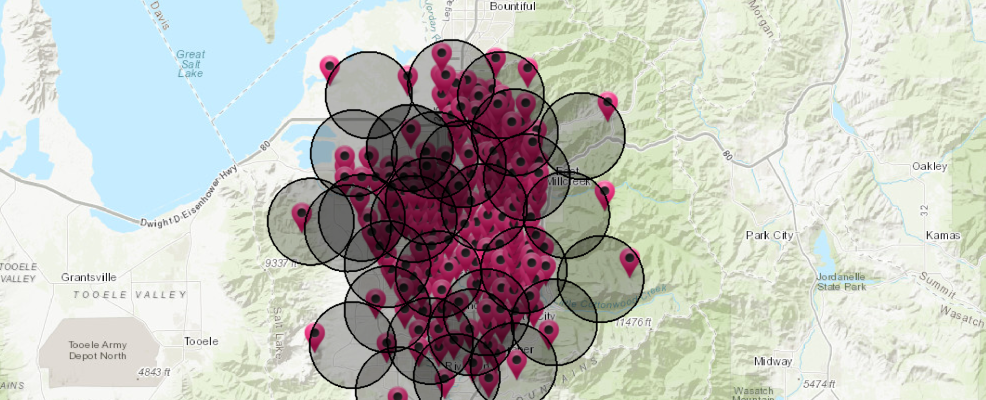

In [3]:
# NBVAL_IGNORE_OUTPUT
gis = GIS()
m = gis.map("Millcreek, UT", zoomlevel=10)
m.add_layer(d.spatial.to_featureset())
m.add_layer(s.spatial.to_featureset())
m.add_layer(s2.spatial.to_featureset())
m

#### Create the coverage

In [4]:
coverage1 = Coverage.from_spatially_enabled_dataframes(d, s, "GEOID10", "ORIG_ID")
coverage2 = Coverage.from_spatially_enabled_dataframes(d, s2, "GEOID10", "ORIG_ID")

#### Create the problem

In [5]:
problem = Problem.lscp([coverage1, coverage2])

#### Solve the problem

In [6]:
problem.solve(pulp.GLPK(msg=False));

#### Plot the selected locations

In [7]:
# NBVAL_IGNORE_OUTPUT
selected_locations = s.query(f"ORIG_ID in ({','.join(problem.selected_supply(coverage1))})")
selected_locations2 = s2.query(f"ORIG_ID in ({','.join(problem.selected_supply(coverage2))})")
m = gis.map("Millcreek, UT", zoomlevel=10)
m.add_layer(d.spatial.to_featureset())
m.add_layer(selected_locations.spatial.to_featureset())
m.add_layer(selected_locations2.spatial.to_featureset())
m

MapView(layout=Layout(height='400px', width='100%'))

#### Find the total number of locations required

In [8]:
print(problem.pulp_problem.objective.value())

24
